In [2]:
import pandas as pd
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1)
sns.set_palette("colorblind")

# dry = "size_counters/220701-152907"
bench = Path("size_counters/221117-115104")

# in minutes
times = [60, 120, 180]
points = list(range(3))


def diff(a: pd.DataFrame, b: pd.DataFrame) -> pd.DataFrame:
    out = b.copy()
    out[out.columns[2:]] -= a[a.columns[2:]]
    return out


def total(d: pd.DataFrame) -> pd.DataFrame:
    return d.loc[:, d.columns != "CPU"].groupby(["op"]).sum()


def load(t: int, p: int) -> pd.DataFrame:
    df = pd.read_csv(bench / f"t{t}" / f"t{p}.csv")
    df.loc[df["op"] == "a", "op"] = "kernel"
    df.loc[df["op"] == "u", "op"] = "user"
    df.loc[df["op"] == "f", "op"] = "free"
    return df


benches = [[load(t, p) for p in points] for t in times]


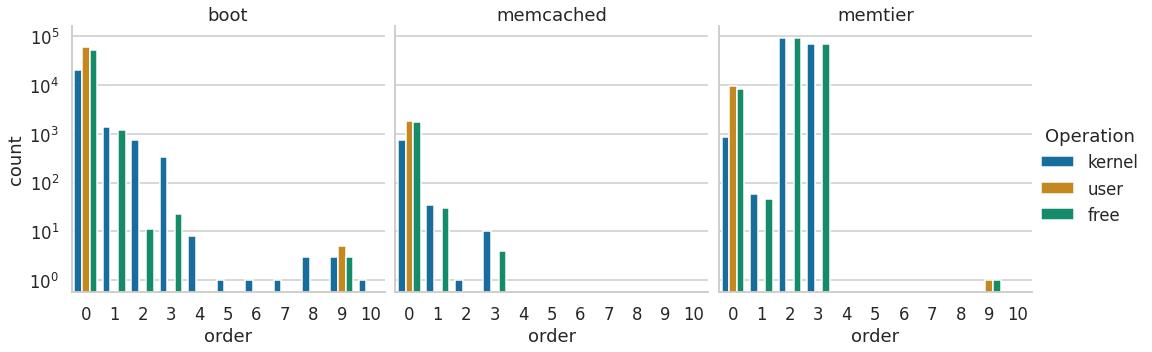

In [4]:
# Allocation / Free Counts for memtier 60s
p = benches[0]
b0 = p[0].copy()
b0["p"] = "boot"
b1 = diff(p[0], p[1])
b1["p"] = "memcached"
b2 = diff(p[1], p[2])
b2["p"] = "memtier"

df = pd.concat([b0, b1, b2])
df["count"] += df["bulk"]

plt = sns.catplot(data=df, kind="bar", x="order", y="count", hue="op", col="p")
plt.set(yscale="log")
plt.set_titles("{col_name}")
plt.legend.set_title("Operation")

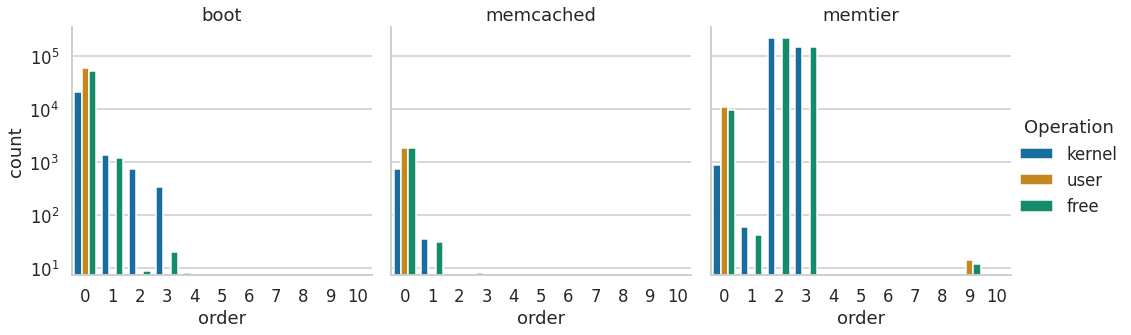

In [69]:
# Allocation / Free Counts for memtier 120s
p = benches[1]
b0 = p[0].copy()
b0["p"] = "boot"
b1 = diff(p[0], p[1])
b1["p"] = "memcached"
b2 = diff(p[1], p[2])
b2["p"] = "memtier"

df = pd.concat([b0, b1, b2])
df["count"] += df["bulk"]

plt = sns.catplot(data=df, kind="bar", x="order", y="count", hue="op", col="p")
plt.set(yscale="log")
plt.set_titles("{col_name}")
plt.legend.set_title("Operation")


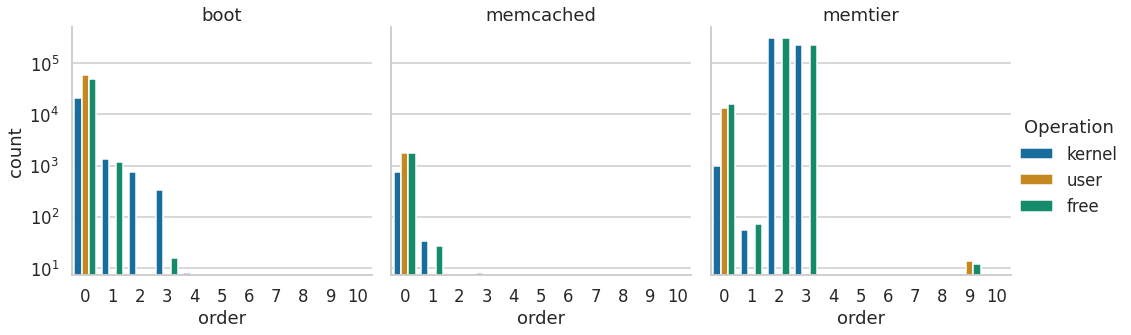

In [70]:
# Allocation / Free Counts for memtier 180s
p = benches[2]
b0 = p[0].copy()
b0["p"] = "boot"
b1 = diff(p[0], p[1])
b1["p"] = "memcached"
b2 = diff(p[1], p[2])
b2["p"] = "memtier"

df = pd.concat([b0, b1, b2])
df["count"] += df["bulk"]

plt = sns.catplot(data=df, kind="bar", x="order", y="count", hue="op", col="p")
plt.set(yscale="log")
plt.set_titles("{col_name}")
plt.legend.set_title("Operation")


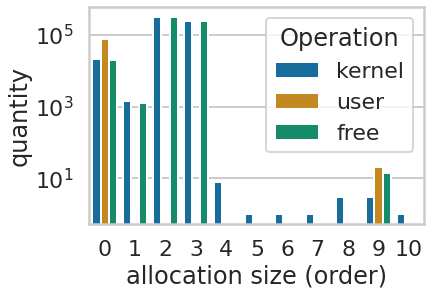

In [16]:
with sns.plotting_context("poster", font_scale=1):
    p = benches[2][2].copy()
    p["size"] = 2**p["order"]
    plt = sns.barplot(p, x="order", y="count", hue="op")
    plt.set(yscale="log")
    plt.legend().set_title("Operation")
    plt.set(xlabel="allocation size (order)")
    plt.set(ylabel="quantity")
    plt.get_figure().savefig("out/size_counters.pdf", bbox_inches='tight')


# Runtime Tests...

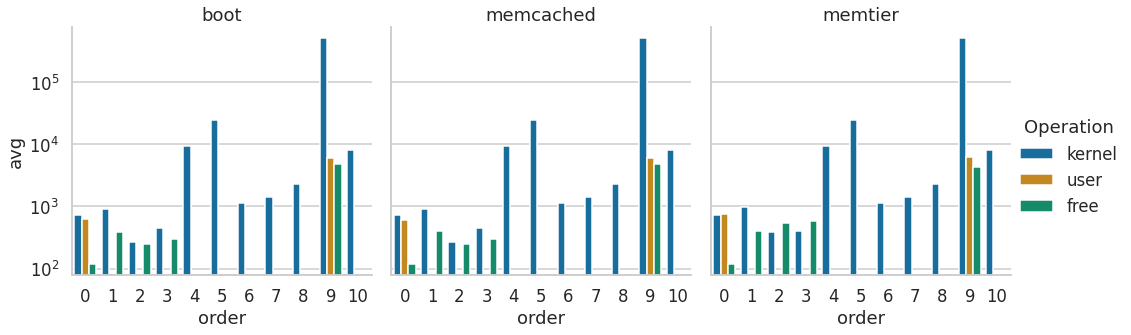

In [65]:
# Allocation / Free average times for memtier 60s
p = benches[0]
b0 = p[0].copy()
b0["p"] = "boot"
b1 = p[1]
b1["p"] = "memcached"
b2 = p[2]
b2["p"] = "memtier"

df = pd.concat([b0, b1, b2])

plt = sns.catplot(data=df, kind="bar", x="order", y="avg", hue="op", col="p")
plt.set(yscale="log")
plt.set_titles("{col_name}")
plt.legend.set_title("Operation")


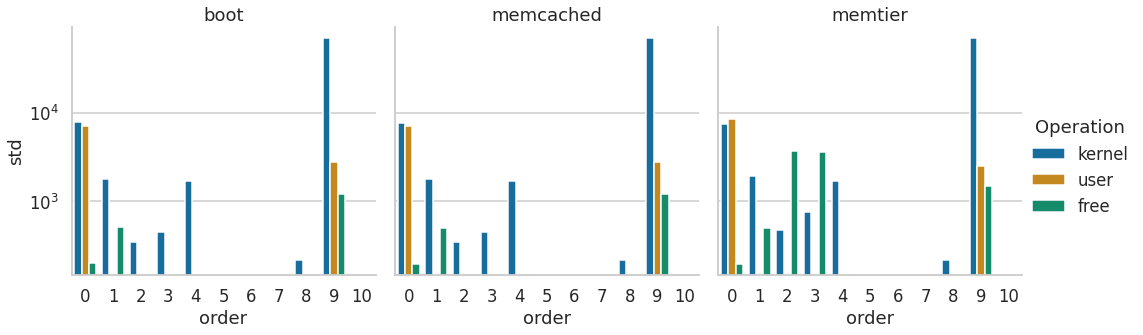

In [66]:
# Allocation / Free time std for memtier 60s
p = benches[0]
b0 = p[0].copy()
b0["p"] = "boot"
b1 = p[1]
b1["p"] = "memcached"
b2 = p[2]
b2["p"] = "memtier"

df = pd.concat([b0, b1, b2])

plt = sns.catplot(data=df, kind="bar", x="order", y="std", hue="op", col="p")
plt.set(yscale="log")
plt.set_titles("{col_name}")
plt.legend.set_title("Operation")
